In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt



In [92]:
import os
df = pd.read_csv('../googleplaystore.csv')

In [93]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [94]:
for i in range(df.shape[0]):
    if '+' in str(df.iloc[i,5]):
        df.iloc[i,5] = float(df.iloc[i,5].replace('+','').replace(',',''))
    if 'Free' in str(df.iloc[i,5]):
        df.iloc[i,5] = 0

In [95]:
for i in range(df.shape[0]):
    if '$' in str(df.iloc[i,7]):
        df.iloc[i,7] = float(df.iloc[i,7].replace('$',''))
    if 'Everyone' in str(df.iloc[i,7]):
        df.iloc[i,7] = 0

In [96]:
for i in range(df.shape[0]):
    if 'M' in str(df.iloc[i,4]):
        df.iloc[i,4] = float(df.iloc[i,4].replace('M',''))
    if 'k' in str(df.iloc[i,4]):
        df.iloc[i,4] = float(df.iloc[i,4].replace('k',''))/float(1000)
    if 'Varies with device' in str(df.iloc[i,4]):
        df.iloc[i,4] = 11.0
    

        
     

In [108]:

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5e+06,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,5e+07,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [109]:
df['Size'].mean()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [148]:
df.groupby('Installs').size().sort_values(ascending=False)


Installs
1000000.0       1579
10000000.0      1252
100000.0        1169
10000.0         1054
1000.0           907
5000000.0        752
100.0            719
500000.0         539
50000.0          479
5000.0           477
100000000.0      409
10.0             386
500.0            330
50000000.0       289
50.0             205
5.0               82
500000000.0       72
1.0               67
1000000000.0      58
0.0               15
0                  1
dtype: int64

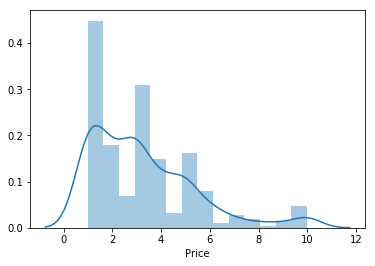

In [58]:

sns.distplot(df[(df['Price']>0.2) & (df['Price']<10)].Price.astype(float))


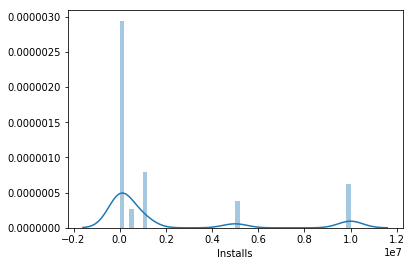

In [39]:

sns.distplot(df[(df['Installs']<20000000)].Installs.astype(float))

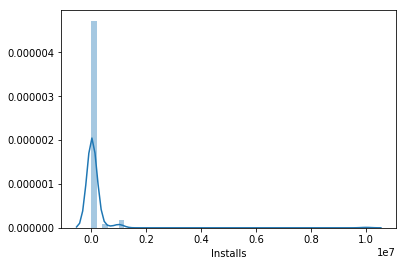

In [40]:
sns.distplot(df[(df['Price']>0.2) & (df['Price']<10)].Installs.astype(float))


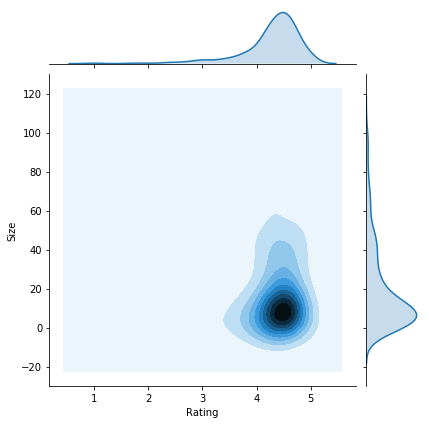

In [59]:
sns.jointplot(x="Rating", y="Size", kind="kde",data=df[(df['Price']>0.2) & (df['Price']<10)]);

In [112]:
df1 = df[['Price','Rating','Installs','Size','Type']]
df1.head()

,Price,Rating,Installs,Size,Type
0,0,4.1,10000,19,Free
1,0,3.9,500000,14,Free
2,0,4.7,5e+06,8.7,Free
3,0,4.5,5e+07,25,Free
4,0,4.3,100000,2.8,Free


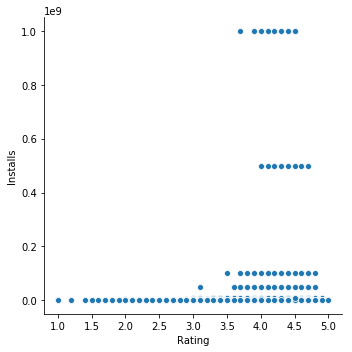

In [74]:
sns.relplot(x="Rating", y="Installs",  data=df[df['Rating']<10])


In [119]:
for i in range(df.shape[0]):
    if '$' in str(df.iloc[i,7]):
        df.iloc[i,7] = int(df.iloc[i,7].replace('$',''))
    if 'Everyone' in str(df.iloc[i,7]):
        df.iloc[i,7] = 0
        
    
        

In [120]:
for i in range(df.shape[0]):
    if '+' in str(df.iloc[i,5]):
        df.iloc[i,5] = float(df.iloc[i,5].replace('+','').replace(',',''))

        

In [124]:
df1.head()

,Price,Rating,Installs,Size,Type
0,0,4.1,10000,19,Free
1,0,3.9,500000,14,Free
2,0,4.7,5e+06,8.7,Free
3,0,4.5,5e+07,25,Free
4,0,4.3,100000,2.8,Free


In [102]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5e+06,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,5e+07,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [103]:
df[(df.Price >= '5')].Price

Series([], Name: Price, dtype: object)

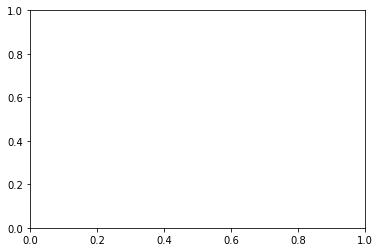

In [104]:
df1 = df[['Price','Rating']]
sns.kdeplot(df[(df.Price >= '1') & (df.Price < '100')].Installs)


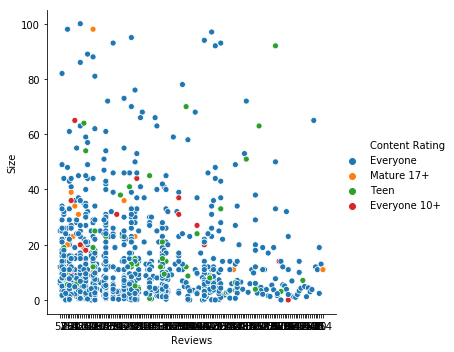

In [126]:
sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

sns.relplot(x="Reviews", y="Size", hue='Content Rating', hue_norm=(0, 7),data=df[(df['Installs']<2000) & (df['Rating']<5) ])

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

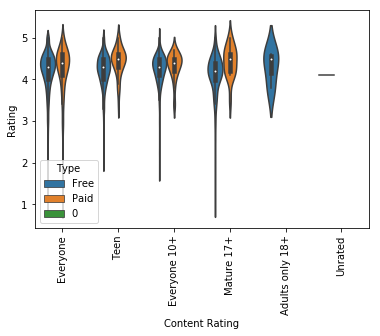

In [115]:
sns.violinplot(x="Content Rating", y="Rating",hue='Type',data=df)
plt.xticks(rotation=90)

In [136]:
df1 = df[['Price','Rating','Installs','Size','Category']]
df1.head()

,Price,Rating,Installs,Size,Category
0,0,4.1,10000,19,ART_AND_DESIGN
1,0,3.9,500000,14,ART_AND_DESIGN
2,0,4.7,5e+06,8.7,ART_AND_DESIGN
3,0,4.5,5e+07,25,ART_AND_DESIGN
4,0,4.3,100000,2.8,ART_AND_DESIGN


In [139]:
X = df1.drop('Category', axis=1)  
y = df1['Category']  

In [151]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  


In [152]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)  


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [150]:
df.groupby('Size').size().sort_values(ascending=False)


Size
11.0000    1893
12.0000     196
14.0000     194
13.0000     191
15.0000     184
17.0000     160
19.0000     154
16.0000     149
26.0000     149
10.0000     146
25.0000     143
20.0000     139
21.0000     138
24.0000     136
18.0000     133
23.0000     117
22.0000     114
29.0000     103
27.0000      97
28.0000      95
30.0000      84
33.0000      79
3.3000       77
37.0000      76
35.0000      72
31.0000      70
2.9000       69
2.5000       68
2.3000       68
3.4000       65
           ... 
0.7200        1
0.7170        1
0.7160        1
0.7140        1
0.7130        1
0.7050        1
0.6960        1
0.6950        1
0.6910        1
0.6880        1
0.6830        1
0.6760        1
0.6630        1
0.6550        1
0.5970        1
0.6470        1
0.6430        1
0.6420        1
0.6360        1
0.6290        1
0.6260        1
0.6240        1
0.6190        1
0.6130        1
0.6090        1
0.6080        1
0.6010        1
0.6000        1
0.5980        1
0.0085        1
Length: 460, dtype: